In [97]:
import json
import re
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import pandas as pd

In [98]:
data = None
raw_sentences = {}
sentences = {}
nlp = spacy.load("en_core_web_trf")

In [ ]:
with open("/Users/parvinderjit.singh/Desktop/Harvard/CSCI E-599/Patent_Visualization_Project/text-mining-poc/protein-sequences/test_data.json", "r") as read_file:
    data = json.load(read_file)

In [ ]:
for patent in data:
    raw_sentences[patent["patentid"]] = []
    raw_sentences[patent["patentid"]] += sent_tokenize(patent['abstract'])
    raw_sentences[patent["patentid"]] += sent_tokenize(patent['claims'])
    raw_sentences[patent["patentid"]] += sent_tokenize(patent['description'])

In [ ]:
for k in raw_sentences.keys():
    sentences[k] = []
    for s in raw_sentences[k]:
        if re.search('SEQ ID', s, re.IGNORECASE):
            sentences[k].append(s)

In [ ]:
total_sentences = 0
for k in sentences.keys():
    total_sentences += len(sentences[k])
print(total_sentences)

In [ ]:
columns = ['patent', 'sentence', 'has_epitope']
index = [num for num in range(total_sentences)]
df = pd.DataFrame(index=index, columns=columns)

In [ ]:
df.head()

In [ ]:
curr_index = 0
for k in sentences.keys():
    for sent in sentences[k]:
        df['patent'][curr_index] = k
        df['sentence'][curr_index] = sent
        df['has_epitope'][curr_index] = int(input(sent))
        curr_index += 1

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.to_csv('test_data.csv', sep="|")

In [1]:
import pandas as df


In [2]:
ptData = df.read_csv('test_data.csv', sep="|")

In [3]:
    ptData[ptData.has_epitope == 1].sentence[0]

"An isolated monoclonal antibody, wherein, when bound to PCSK9, said monoclonal antibody binds to at least one residue within the sequence set forth by residues 123-132 of SEQ ID NO: 1, and wherein said monoclonal antibody reduces binding between PCSK9 and an EGFa domain of LDLR protein antagonizes PCSK9's inhibition of cellular LDL uptake."

In [4]:
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
nlp = spacy.load("en_core_web_trf")

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import re

In [5]:

epitope_counts = {}
total_counts = {}
num = 0
punc = '''!()[]{};:'"\, <>./?@#$%^&*_~'''
cleaned_sentences = []
for _, row in ptData.iterrows():
    num += 1
    if num % 10 == 0:
        print("Processing item", num)
    doc = nlp(row.sentence)
    token_list = [token.text for token in doc]
    filtered_sentence =[] 

    for word in token_list:
        if word in punc: continue
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)   

    lemma_word = []
    for w in filtered_sentence:
        if re.match('^[a-zA-z]?[0-9]*$', w):
            continue
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    cleaned_sentences.append(' '.join(lemma_word))
    
        #if row.has_epitope:
        #    if word3 in epitope_counts:
        #        epitope_counts[word3] += 1
        #    else:
        #        epitope_counts[word3] = 1
        #if word3 in total_counts:
        #    total_counts[word3] += 1
        #else:
        #    total_counts[word3] = 1



Processing item 10
Processing item 20
Processing item 30
Processing item 40
Processing item 50
Processing item 60
Processing item 70
Processing item 80
Processing item 90
Processing item 100
Processing item 110
Processing item 120
Processing item 130
Processing item 140
Processing item 150
Processing item 160
Processing item 170
Processing item 180
Processing item 190
Processing item 200
Processing item 210
Processing item 220
Processing item 230
Processing item 240
Processing item 250
Processing item 260
Processing item 270
Processing item 280
Processing item 290
Processing item 300
Processing item 310
Processing item 320
Token indices sequence length is longer than the specified maximum sequence length for this model (784 > 512). Running this sequence through the model will result in indexing errors
Processing item 330
Processing item 340


In [6]:

cleaned_sentences[0]

'isolate monoclonal antibody bind PCSK9 say monoclonal antibody bind residue sequence set forth residue - SEQ ID say monoclonal antibody reduce bind PCSK9 EGFa domain LDLR protein antagonize PCSK9 inhibition cellular LDL uptake'

In [7]:
ptData.sentence[0]

"An isolated monoclonal antibody, wherein, when bound to PCSK9, said monoclonal antibody binds to at least one residue within the sequence set forth by residues 123-132 of SEQ ID NO: 1, and wherein said monoclonal antibody reduces binding between PCSK9 and an EGFa domain of LDLR protein antagonizes PCSK9's inhibition of cellular LDL uptake."

In [8]:
print("cleaned_sentences: ", len(cleaned_sentences))
print("ptData.sentence: ", len(ptData.sentence))

cleaned_sentences:  341
ptData.sentence:  341


In [9]:
print("not ptData.has_epitope: ", len(ptData[ptData.has_epitope == 0]))
print("ptData.has_epitope: ", len(ptData[ptData.has_epitope == 1]))

not ptData.has_epitope:  309
ptData.has_epitope:  32


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_sentences, ptData.has_epitope, test_size=0.33, random_state=42)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from imblearn.ensemble import EasyEnsembleClassifier

In [13]:
# Build the model
model = make_pipeline(TfidfVectorizer(), EasyEnsembleClassifier(n_estimators=1000))

# Train the model using the training data
model.fit(X_train, y_train)

# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, cleaned_sentences, ptData.has_epitope, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))

# Predict the categories of the test data
predicted_categories = model.predict(X_test)

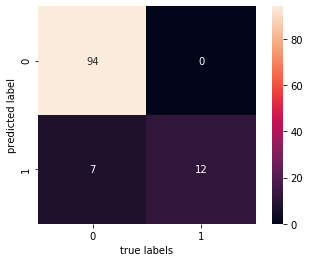

The accuracy is 0.9380530973451328


In [14]:
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predicted_categories)))

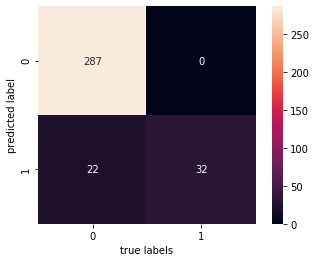

The accuracy is 0.9354838709677419


In [15]:
predicted_categories = model.predict(cleaned_sentences)
mat = confusion_matrix(ptData.has_epitope, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(ptData.has_epitope, predicted_categories)))

In [31]:
for _, row in ptData[ptData.has_epitope == predicted_categories].iterrows():
    #print(row[2])
    if row.has_epitope == 1:
        print(row.sentence, '\n\n')

An isolated monoclonal antibody, wherein, when bound to PCSK9, said monoclonal antibody binds to at least one residue within the sequence set forth by residues 123-132 of SEQ ID NO: 1, and wherein said monoclonal antibody reduces binding between PCSK9 and an EGFa domain of LDLR protein antagonizes PCSK9's inhibition of cellular LDL uptake. 


In some embodiments, the antibody binds to an epitope within residues 31-447 of SEQ ID NO: 3. 


In some aspects, the invention comprises a neutralizing antigen binding protein that binds to PCSK9, wherein the antigen binding protein binds to PCSK9 at a location within residues 31-447 of SEQ ID NO: 3. 


The antibody binds to PCSK9 at a location within residues 31-447 of SEQ ID NO: 3. 


In some aspects, the invention comprises an isolated neutralizing antibody, wherein when the antibody is bound to PCSK9, the antibody is positioned 8 angstroms or less from at least one of the following residues of PCSK9: T468, R469, M470, A471, T472, R496, R499, 

In [84]:
ep_regex = re.compile('\s[A-Z]?\d+[),.\s-]+[A-Z]?\d*')
s1 = "An isolated monoclonal antibody, wherein, when bound to PCSK9, said monoclonal antibody binds to at least one residue within the sequence set forth by residues 123-132 of SEQ ID NO: 1, and wherein said monoclonal antibody reduces binding between PCSK9 and an EGFa domain of LDLR protein antagonizes PCSK9's inhibition of cellular LDL uptake." 
s2 = "In some embodiments, the antibody binds to an epitope within residues 31-447 of SEQ ID NO: 3."
s3 = "In some aspects, the invention comprises an isolated neutralizing antibody, wherein when the antibody is bound to PCSK9, the antibody is positioned 8 angstroms or less from at least one of the following residues of PCSK9: T468, R469, M470, A471, T472, R496, R499, E501, A502, Q503, R510, H512, F515, P540, P541, A542, E543, H565, W566, E567, V568, E569, R592, E593, S465, G466, P467, A473, I474, R476, G497, E498, M500, G504, K506, L507, V508, A511, N513, A514, G516, V536, T538, A539, A544, T548, D570, L571, H591, A594, S595, and H597 of SEQ ID NO: 3."


In [85]:
s1_matches = re.finditer(ep_regex, s1)
seq_id = []
epitopes = []
for match in s1_matches:
    if 'SEQ ID' in s1[match.span()[0] - 15:match.span()[1]]:
        seq_id.append(match.group().strip().strip(',').strip('.'))
    else:
        epitopes.append(match.group().strip())
print(seq_id)
print(epitopes)

['1']
['123-132']


In [86]:
s2_matches = re.finditer(ep_regex, s2)
seq_id2 = []
epitopes2 = []
for match in s2_matches:
    if 'SEQ ID' in s2[match.span()[0] - 15:match.span()[1]]:
        seq_id2.append(match.group().strip().strip(',').strip('.'))
    else:
        epitopes2.append(match.group().strip())
print(seq_id2)
print(epitopes2)

['3']
['31-447']


In [87]:
s3_matches = re.finditer(ep_regex, s3)
seq_id3 = []
epitopes3 = []
for match in s3_matches:
    if 'SEQ ID' in s3[match.span()[0] - 15:match.span()[1]]:
        seq_id3.append(match.group().strip().strip(',').strip('.'))
    else:
        epitopes3.append(match.group().strip())
print(seq_id3)
print(epitopes3)

['3']
['8', 'T468, R469', 'M470, A471', 'T472, R496', 'R499, E501', 'A502, Q503', 'R510, H512', 'F515, P540', 'P541, A542', 'E543, H565', 'W566, E567', 'V568, E569', 'R592, E593', 'S465, G466', 'P467, A473', 'I474, R476', 'G497, E498', 'M500, G504', 'K506, L507', 'V508, A511', 'N513, A514', 'G516, V536', 'T538, A539', 'A544, T548', 'D570, L571', 'H591, A594', 'S595,', 'H597']


In [89]:
for _, row in ptData[predicted_categories == 1].iterrows():
    s3_matches = re.finditer(ep_regex, row.sentence)
    seq_id3 = []
    epitopes3 = []
    for match in s3_matches:
        if 'SEQ ID' in row.sentence[match.span()[0] - 15:match.span()[1]]:
            seq_id3.append(match.group().strip().strip(',').strip('.').strip(')'))
        else:
            epitopes3.append(match.group().strip())
    print(row.sentence)
    print(seq_id3)
    print(epitopes3)

t one residue within the sequence set forth by residues 123-132 of SEQ ID NO: 1, and wherein said monoclonal antibody reduces binding between PCSK9 and an EGFa domain of LDLR protein antagonizes PCSK9's inhibition of cellular LDL uptake.
['1']
['123-132']
In some embodiments, the antibody binds to an epitope within residues 31-447 of SEQ ID NO: 3.
['3']
['31-447']
In some embodiments, the antibody binds to PCSK9 having an amino acid sequence that is at least 90% identical to SEQ ID NO: 3.
['3']
[]
In some aspects, the invention comprises a neutralizing antigen binding protein that binds to PCSK9, wherein the antigen binding protein binds to PCSK9 at a location within residues 31-447 of SEQ ID NO: 3.
['3']
['31-447']
The antibody binds to PCSK9 at a location within residues 31-447 of SEQ ID NO: 3.
['3']
['31-447']
In some aspects, the invention comprises an isolated neutralizing antibody, wherein when the antibody is bound to PCSK9, the antibody is positioned 8 angstroms or less from at

In [90]:
ptData.patent.unique()

array([    8563698, 20120195910,     8188234,     8080243])

In [91]:
import requests
response = requests.get('https://uspto-documents-storage.s3.amazonaws.com/docs/US8829165B2.xml')

In [92]:
import xml.etree.ElementTree as et

class Patent:
    def __init__(self, patent_id):
        self.patentNumber = patent_id
        self.__process_xml()
      
        
    def __process_xml(self):
        tree = et.parse(self.patentNumber + '.xml')
        root = tree.getroot()
        self.patentName = root.find('.//invention-title').text
        self.patentDate = root.find('.//publication-reference').find('.//date').text
        self.inventors = [el.find('.//first-name').text + ' ' + 
                            el.find('.//last-name').text
                            for el in root.findall('.//inventor')]
        self.abstract = ' '.join([' '.join(el.itertext()) 
                            for el in root.findall('.//abstract')])
        self.description = ' '.join([' '.join(el.itertext()) 
                            for el in root.findall('.//description')])
        self.claims = [' '.join(el.itertext()) 
                            for el in root.findall('.//claim')]
        self.patentAssignees = [el.find('.//orgname').text 
                            for el in root.findall('.//assignee')]
        self.applicants = [el.find('.//orgname').text 
                                for el in root.findall('.//us-applicant')]
        self.examiners = root.find('.//primary-examiner').find('.//first-name').text + ' ' + root.find('.//primary-examiner').find('.//last-name').text
        self.claimsCount = len(self.claims)
        self.appNumber = root.find('.//application-reference').find('.//doc-number').text
        self.appDate = root.find('.//application-reference').find('.//date').text

In [94]:
with open('test.xml', 'wb') as f:
    f.write(response.content)
patent = Patent('test')

In [96]:
patent.patentName

'Antigen binding proteins to proprotein convertase subtilisin kexin type 9 (PCSK9)'

In [100]:
raw_sentences = []
raw_sentences += sent_tokenize(patent.abstract)
raw_sentences += patent.claims
raw_sentences += sent_tokenize(patent.description)

In [103]:
sentences = []
for s in raw_sentences:
    if re.search('SEQ ID', s, re.IGNORECASE):
        sentences.append(s)
print(sentences[:5])

['1. An isolated monoclonal antibody, wherein, when bound to PCSK9, the monoclonal antibody binds to at least one of the following residues: S153, I154, P155, R194, D238, A239, I369, S372, D374, C375, T377, C378, F379, V380, or S381 of SEQ ID NO:3, and wherein the monoclonal antibody blocks binding of PCSK9 to LDLR.', '17. A pharmaceutical composition comprising an isolated monoclonal antibody, wherein, when bound to PCSK9, the isolated monoclonal antibody binds to at least one of the following residues: S153, I154, P155, R194, D238, A239, I369, S372, D374, C375, T377, C378, F379, V380, or S381 of SEQ ID NO:3, and wherein the monoclonal antibody blocks binding of PCSK9 to LDLR.', '19. The isolated monoclonal antibody of  claim 1  wherein the isolated monoclonal antibody binds to at least two of the following residues S153, I154, P155, R194, D238, A239, I369, S372, D374, C375, T377, C378, F379, V380, or S381 of PCSK9 listed in SEQ ID NO:3.', '20. The isolated monoclonal antibody of  cla

In [104]:
cleaned_sentences = []
for sentence in sentences:
    doc = nlp(sentence)
    token_list = [token.text for token in doc]
    filtered_sentence =[] 

    for word in token_list:
        if word in punc: continue
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)   

    lemma_word = []
    for w in filtered_sentence:
        if re.match('^[a-zA-z]?[0-9]*$', w):
            continue
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    cleaned_sentences.append(' '.join(lemma_word))

In [105]:
predicted_categories = model.predict(cleaned_sentences)
sum(predicted_categories)

46

In [110]:
print(len(sentences))

131


In [111]:
for i in range(len(sentences)):
    if predicted_categories[i] == 0:
        print(sentences[i])

lected from the group consisting of D, and E, X 6  is selected from the group consisting of V, I, M, L, F, and A, B) a light chain complementary determining region (CDRL) selected from at least one of the group consisting of: (i) a CDRL3 selected from the CDRL3 within the sequences selected from the group consisting of SEQ ID NOs: 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, and 24, (ii) a CDRL3 that differs in amino acid sequence from the CDRL3 of (i) by an amino acid addition, deletion or substitution of not more than two amino acids; and (iii) a CDRL3 amino acid sequence selected from the group consisting of X 1 X 2 X 3 X 4 X 5 X 6 X 7 X 8 X 9  (SEQ ID NO: 417), wherein X 1  is selected from the group consisting of S, N, T, A, C, and Q, X 2  is selected from the group consisting of S, T, A, and C, X 3  is selected from the group consisting of Y, W, F, T, and S, X 4  is selected from the group consisting of T, and S, X 5  is selected from the group consisting of S, T, A, and C, X 6  is se

In [109]:
for i in range(len(sentences)):
    if predicted_categories[i] == 1:
        s3_matches = re.finditer(ep_regex, sentences[i])
        seq_id3 = []
        epitopes3 = []
        for match in s3_matches:
            if 'SEQ ID' in sentences[i][match.span()[0] - 15:match.span()[1]]:
                seq_id3.append(match.group().strip().strip(',').strip('.').strip(')'))
            else:
                epitopes3.append(match.group().strip())
        print(sentences[i])
        print(seq_id3)
        print(epitopes3)

1. An isolated monoclonal antibody, wherein, when bound to PCSK9, the monoclonal antibody binds to at least one of the following residues: S153, I154, P155, R194, D238, A239, I369, S372, D374, C375, T377, C378, F379, V380, or S381 of SEQ ID NO:3, and wherein the monoclonal antibody blocks binding of PCSK9 to LDLR.
[]
['S153, I154', 'P155, R194', 'D238, A239', 'I369, S372', 'D374, C375', 'T377, C378', 'F379, V380', 'S381']
17. A pharmaceutical composition comprising an isolated monoclonal antibody, wherein, when bound to PCSK9, the isolated monoclonal antibody binds to at least one of the following residues: S153, I154, P155, R194, D238, A239, I369, S372, D374, C375, T377, C378, F379, V380, or S381 of SEQ ID NO:3, and wherein the monoclonal antibody blocks binding of PCSK9 to LDLR.
[]
['S153, I154', 'P155, R194', 'D238, A239', 'I369, S372', 'D374, C375', 'T377, C378', 'F379, V380', 'S381']
19. The isolated monoclonal antibody of  claim 1  wherein the isolated monoclonal antibody binds t